# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 and steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("./data/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './data/pizza_steak'.
There are 2 directories and 0 images in './data/pizza_steak\test'.
There are 0 directories and 250 images in './data/pizza_steak\test\pizza'.
There are 0 directories and 250 images in './data/pizza_steak\test\steak'.
There are 2 directories and 0 images in './data/pizza_steak\train'.
There are 0 directories and 750 images in './data/pizza_steak\train\pizza'.
There are 0 directories and 750 images in './data/pizza_steak\train\steak'.


In [11]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("./data/pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [13]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('./data/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirector
print(class_names)

['pizza' 'steak']


In [14]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['872094.jpg']
Image shape: (512, 512, 3)


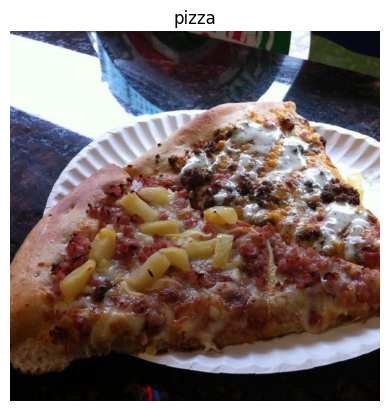

In [18]:
# View a random image from the training dataset
img = view_random_image(target_dir='./data/pizza_steak/train/',
                        target_class='pizza')

In [20]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 81,  79, 118],
        [ 82,  80, 119],
        [ 75,  70, 110],
        ...,
        [  8,  10,  22],
        [  6,   8,  20],
        [  5,   7,  19]],

       [[100,  99, 133],
        [ 77,  76, 110],
        [ 63,  62,  96],
        ...,
        [  8,  10,  22],
        [  6,   8,  20],
        [  5,   7,  19]],

       [[ 89,  90, 118],
        [ 67,  68,  96],
        [ 72,  73, 101],
        ...,
        [  7,   9,  21],
        [  6,   8,  20],
        [  5,   7,  19]],

       ...,

       [[  6,   6,   4],
        [  5,   5,   3],
        [  5,   5,   3],
        ...,
        [  4,   3,   1],
        [  5,   4,   2],
        [  5,   4,   2]],

       [[  4,   4,   2],
        [  4,   4,   2],
        [  3,   3,   1],
        ...,
        [  4,   3,   1],
        [  5,   4,   2],
        [  5,   4,   2]],

       [[  3,   3,   1],
        [  2,   2,   0],
        [  2,   2,   0],
        ...,
        [  4,   3,   

In [22]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [24]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.31764706, 0.30980392, 0.4627451 ],
        [0.32156863, 0.31372549, 0.46666667],
        [0.29411765, 0.2745098 , 0.43137255],
        ...,
        [0.03137255, 0.03921569, 0.08627451],
        [0.02352941, 0.03137255, 0.07843137],
        [0.01960784, 0.02745098, 0.0745098 ]],

       [[0.39215686, 0.38823529, 0.52156863],
        [0.30196078, 0.29803922, 0.43137255],
        [0.24705882, 0.24313725, 0.37647059],
        ...,
        [0.03137255, 0.03921569, 0.08627451],
        [0.02352941, 0.03137255, 0.07843137],
        [0.01960784, 0.02745098, 0.0745098 ]],

       [[0.34901961, 0.35294118, 0.4627451 ],
        [0.2627451 , 0.26666667, 0.37647059],
        [0.28235294, 0.28627451, 0.39607843],
        ...,
        [0.02745098, 0.03529412, 0.08235294],
        [0.02352941, 0.03137255, 0.07843137],
        [0.01960784, 0.02745098, 0.0745098 ]],

       ...,

       [[0.02352941, 0.02352941, 0.01568627],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "./data/pizza_steak/train"
test_dir = "./data/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN mmodel (same as the Tiny VGG on the CNN explainer websit)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 36s 742ms/step - loss: 0.7091 - accuracy: 0.5887 - val_loss: 0.6363 - val_accuracy: 0.6060
Epoch 2/5
47/47 [==============================] - 35s 740ms/step - loss: 0.5511 - accuracy: 0.7113 - val_loss: 0.4317 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 34s 733ms/step - loss: 0.4534 - accuracy: 0.7927 - val_loss: 0.3923 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 34s 733ms/step - loss: 0.4408 - accuracy: 0.8013 - val_loss: 0.4062 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 35s 742ms/step - loss: 0.3846 - accuracy: 0.8333 - val_loss: 0.3299 - val_accuracy: 0.8560


> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [29]:
# Get a model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

What do you notice about the names of `model_1`'s layers and the layer names at the top of the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)?

I'll let you in on a little secret: we've replicated the exact architecture they use for their model demo.

Look at you go! **You're already starting to replicate models you find in the wild**.

Now there are a few new things here we haven't discussed, namely:

* The `ImageDataGenerator` class and the rescale parameter
* The `flow_from_directory()` method
    * The `batch_size` parameter
    * The `target_size` parameter
* `Conv2D` layers (and the parameters which come with them)
* `MaxPool2D` layers (and their parameters).
* The `steps_per_epoch` and `validation_steps` parameters in the `fit()` function

Before we dive into each of these, let's see what happens if we try to fit a model we've worked with previously to our data.

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:

* **The data** - we're now working with images instead of dots.
* **The input shape** - we have to tell our neural network the shape of the images we're working with.
    * A common practice is to reshape images all to one size. In our case, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [30]:
train_data

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 119ms/step - loss: 0.7311 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 106ms/step - loss: 0.6932 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5000


In [32]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it

In [34]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 4.2352 - accuracy: 0.6360 - val_loss: 2.2376 - val_accuracy: 0.5180
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 1.7328 - accuracy: 0.6607 - val_loss: 0.6036 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6871 - accuracy: 0.7220 - val_loss: 2.3656 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.8051 - accuracy: 0.7493 - val_loss: 0.8340 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5556 - accuracy: 0.7567 - val_loss: 0.4758 - val_accuracy: 0.7600


In [35]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
15000000/31000

483.8709677419355

In [38]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

## Binary Classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Become one with the data

['2568848.jpg']
Image shape: (384, 512, 3)
['3066951.jpg']
Image shape: (512, 512, 3)


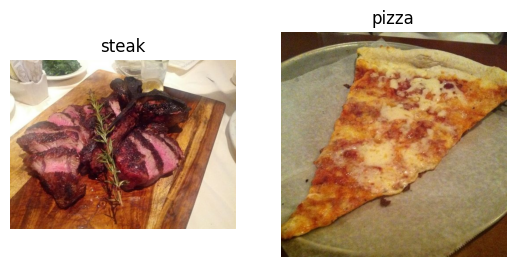

In [42]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("./data/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("./data/pizza_steak/train/", "pizza")